# EPSILON GREEDY

Epsilon: 0.1
Average Total Reward: 2458.15
Average Regret: [0.03       0.5        0.33333333 ... 0.4964883  0.49653565 0.496585  ]
Optimal Ad for epsilon 0.1: 5

Epsilon: 0.075
Average Total Reward: 2455.5
Average Regret: [0.07       0.535      0.35666667 ... 0.49676035 0.49680268 0.49685   ]
Optimal Ad for epsilon 0.075: 5

Epsilon: 0.05
Average Total Reward: 2439.35
Average Regret: [0.01       0.495      0.33       ... 0.49836867 0.49841484 0.498465  ]
Optimal Ad for epsilon 0.05: 5

Epsilon: 0.025
Average Total Reward: 2351.02
Average Regret: [0.03       0.515      0.34333333 ... 0.50722144 0.50724972 0.507298  ]
Optimal Ad for epsilon 0.025: 5



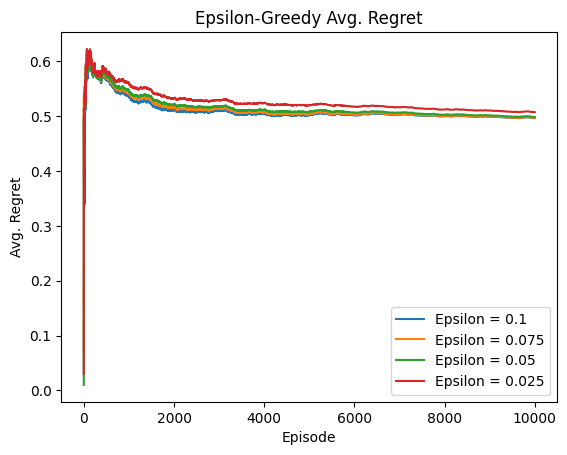

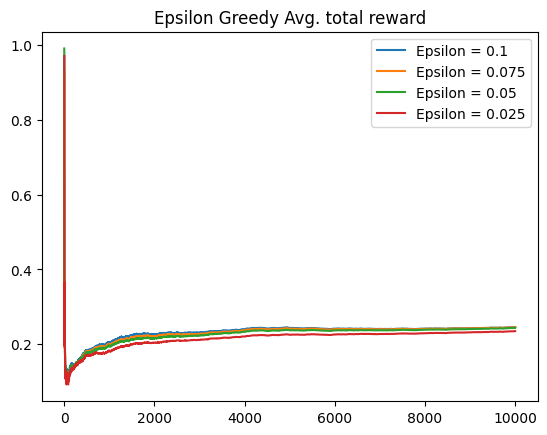

Running time = 2.1003380599999977 menit


In [6]:
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt

awal = timeit.default_timer()

df = pd.read_csv("D:/Tugas Akhir/dataset/Ads_CTR_Optimisation.csv")
ads = df.values
num_ads = ads.shape[1]
num_episodes = ads.shape[0]

epsilons = [0.1, 0.075, 0.05, 0.025]
avg_total_rewards = []
avg_regrets = []
avg_reward_records = []

for epsilon in epsilons:
    total_rewards = np.zeros(100)
    regrets = np.zeros((100, num_episodes))
    reward_records = []

    for run in range(100):
        q_values = np.zeros(num_ads)
        n_values = np.zeros(num_ads)
        total_reward = 0
        regret = 0

        reward_record = [0] * num_episodes
        for i in range(num_episodes):
            if np.random.uniform() < epsilon:
                ad_chosen = np.random.randint(num_ads)
            else:
                ad_chosen = q_values.argmax()

            reward = ads[i, ad_chosen]
            total_reward += reward

            n_values[ad_chosen] += 1
            q_values[ad_chosen] += (reward - q_values[ad_chosen]) / n_values[ad_chosen]

            optimal_reward = ads[i].max()
            regret += optimal_reward - reward
            regrets[run, i] = regret / (i + 1)

            reward_record[i] = total_reward / (i + 1)

        total_rewards[run] = total_reward
        reward_records.append(reward_record)

    avg_total_reward = total_rewards.mean()
    avg_regret = regrets.mean(axis=0)

    avg_total_rewards.append(avg_total_reward)
    avg_regrets.append(avg_regret)

    avg_reward_record = [sum(x) / len(x) for x in zip(*reward_records)]
    avg_reward_records.append(avg_reward_record)

    print("Epsilon:", epsilon)
    print("Average Total Reward:", avg_total_reward)
    print("Average Regret:", avg_regret)
    print(f"Optimal Ad for epsilon {epsilon}: {np.argmax(q_values)+1}")
    print()

# Plot rata-rata regret
plt.plot(range(num_episodes), avg_regrets[0], label=f"Epsilon = {epsilons[0]}")
plt.plot(range(num_episodes), avg_regrets[1], label=f"Epsilon = {epsilons[1]}")
plt.plot(range(num_episodes), avg_regrets[2], label=f"Epsilon = {epsilons[2]}")
plt.plot(range(num_episodes), avg_regrets[3], label=f"Epsilon = {epsilons[3]}")
plt.title("Epsilon-Greedy Avg. Regret")
plt.xlabel('Episode')
plt.ylabel('Avg. Regret')
plt.legend()
plt.show()

for i in range(len(epsilons)):
    plt.plot(avg_reward_records[i], label=f'Epsilon = {epsilons[i]}')
plt.title("Epsilon Greedy Avg. total reward")
plt.legend()
plt.show()

akhir = timeit.default_timer()
print("Running time =", (akhir - awal) / 60, "menit")


# b


Epsilon: 0.1
Average Total Reward: 2429.04
Average Regret: [0.04       0.51       0.34       ... 0.49940688 0.49944594 0.499496  ]
Optimal Ad for epsilon 0.1: 5

Epsilon: 0.075
Average Total Reward: 2453.6
Average Regret: [0.02       0.505      0.33666667 ... 0.49695239 0.4969937  0.49704   ]
Optimal Ad for epsilon 0.075: 5

Epsilon: 0.05
Average Total Reward: 2423.79
Average Regret: [0.02       0.51       0.34       ... 0.49993199 0.499971   0.500021  ]
Optimal Ad for epsilon 0.05: 5

Epsilon: 0.025
Average Total Reward: 2347.86
Average Regret: [0.01       0.505      0.33666667 ... 0.50753551 0.50756476 0.507614  ]
Optimal Ad for epsilon 0.025: 5



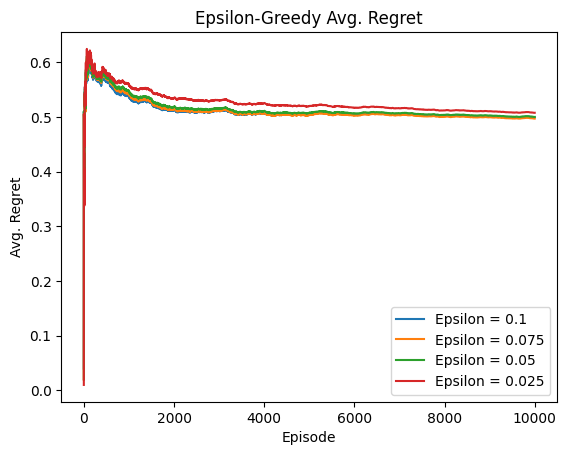

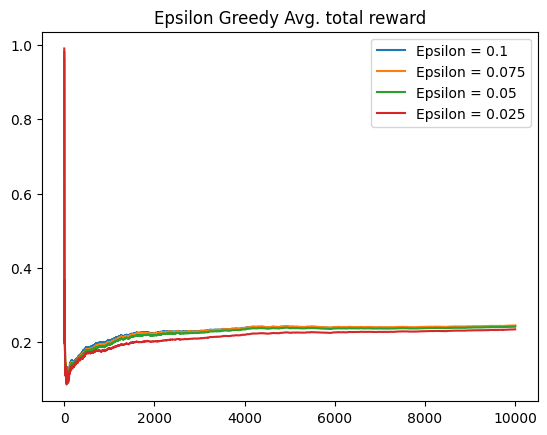

Running time = 3.42936265 menit


In [8]:
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import random

def choose_ad():
    if np.random.uniform() < epsilon:
        return random.randrange(num_ads)
    else:
        max_val = np.max(q_values)
        return np.argmax(q_values)

awal = timeit.default_timer()

df = pd.read_csv("D:/Tugas Akhir/dataset/Ads_CTR_Optimisation.csv")
ads = df.values
num_ads = ads.shape[1]
num_episodes = ads.shape[0]

epsilons = [0.1, 0.075, 0.05, 0.025]
avg_total_rewards = []
avg_regrets = []
avg_reward_records = []

for epsilon in epsilons:
    total_rewards = np.zeros(100)
    regrets = np.zeros((100, num_episodes))
    reward_records = []

    for run in range(100):
        q_values = np.zeros(num_ads)
        n_values = np.zeros(num_ads)
        total_reward = 0
        regret = 0

        reward_record = [0] * num_episodes
        for i in range(num_episodes):
            ad_chosen = choose_ad()

            reward = ads[i, ad_chosen]
            total_reward += reward

            n_values[ad_chosen] += 1
            q_values[ad_chosen] += (reward - q_values[ad_chosen]) / n_values[ad_chosen]

            optimal_reward = ads[i].max()
            regret += optimal_reward - reward
            regrets[run, i] = regret / (i + 1)

            reward_record[i] = total_reward / (i + 1)

        total_rewards[run] = total_reward
        reward_records.append(reward_record)

    avg_total_reward = total_rewards.mean()
    avg_regret = regrets.mean(axis=0)

    avg_total_rewards.append(avg_total_reward)
    avg_regrets.append(avg_regret)

    avg_reward_record = [sum(x) / len(x) for x in zip(*reward_records)]
    avg_reward_records.append(avg_reward_record)

    print("Epsilon:", epsilon)
    print("Average Total Reward:", avg_total_reward)
    print("Average Regret:", avg_regret)
    print(f"Optimal Ad for epsilon {epsilon}: {np.argmax(q_values)+1}")
    print()

# Plot rata-rata regret
plt.plot(range(num_episodes), avg_regrets[0], label=f"Epsilon = {epsilons[0]}")
plt.plot(range(num_episodes), avg_regrets[1], label=f"Epsilon = {epsilons[1]}")
plt.plot(range(num_episodes), avg_regrets[2], label=f"Epsilon = {epsilons[2]}")
plt.plot(range(num_episodes), avg_regrets[3], label=f"Epsilon = {epsilons[3]}")
plt.title("Epsilon-Greedy Avg. Regret")
plt.xlabel('Episode')
plt.ylabel('Avg. Regret')
plt.legend()
plt.show()

for i in range(len(epsilons)):
    plt.plot(avg_reward_records[i], label=f'Epsilon = {epsilons[i]}')
plt.title("Epsilon Greedy Avg. total reward")
plt.legend()
plt.show()

akhir = timeit.default_timer()
print("Running time =", (akhir - awal) / 60, "menit")


# A/B TESTING

Rata-rata total reward selama 100 kali running: 2414.56


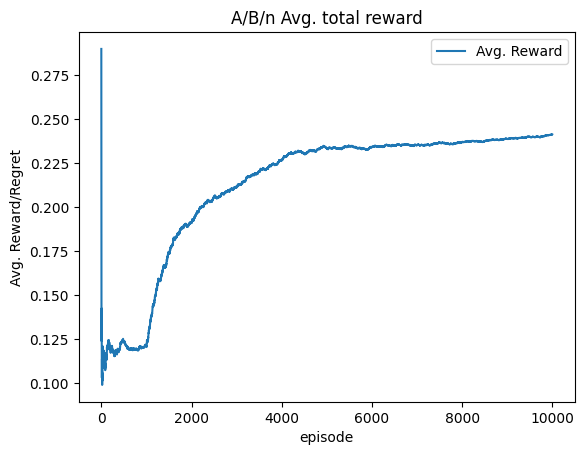

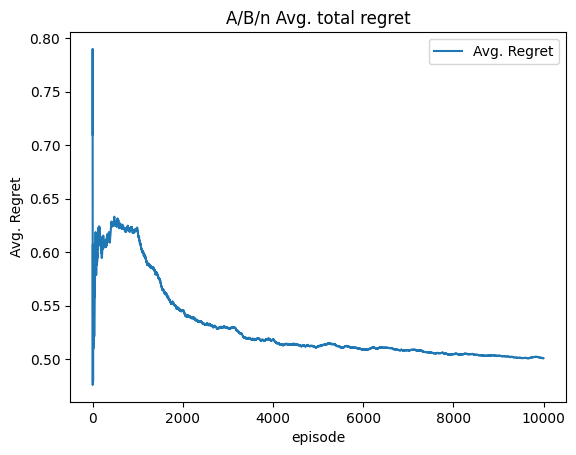

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("D:/Tugas Akhir/dataset/Ads_CTR_Optimisation.csv")
ads = df.values.tolist()
n_ads = len(ads[0])

n_test = 1000
n_prod = 9000
loop = 100
avg_total_rewards = []  # menyimpan average total rewards setiap run
avg_rewards_all = []
avg_regrets_all = []

for run in range(loop):
    Q = np.zeros(n_ads)  # Q, action values
    N = np.zeros(n_ads)  # N, total impressions
    total_reward = 0
    avg_rewards = []  # menyimpan sata-rata reward 
    avg_regrets = []
    total_regret = 0

    # A/B/n test
    for i in range(n_test):
        ad_chosen = np.random.randint(n_ads)
        R = ads[i][ad_chosen]  
        N[ad_chosen] += 1
        Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
        total_reward += R
        avg_rewards.append(total_reward / (i+1))
        
        optimal_reward = max(ads[i])
        total_regret += optimal_reward - R
        avg_regrets.append(total_regret / (i+1))

    avg_reward_so_far = total_reward / n_test

    best_ad_index = np.argmax(Q)  # mencari lengan terbaik


    ad_chosen = best_ad_index

    for i in range(n_prod):
        if i+n_test < len(ads):
            R = ads[i+n_test][ad_chosen]
            total_reward += R
            avg_rewards.append(total_reward / (n_test + i + 1))
            
            optimal_reward = max(ads[i+n_test])
            total_regret += optimal_reward - R
            avg_regrets.append(total_regret / (n_test + i + 1))

    avg_reward_so_far = total_reward / (n_test + n_prod)
    avg_rewards_all.append(avg_rewards)
    avg_total_rewards.append(total_reward)
    
    avg_regrets_all.append(avg_regrets)

print("Rata-rata total reward selama {} kali running: {:.2f}".format(loop, np.mean(avg_total_rewards)))

# Menghitung mean dari rata-rata dari setiap run
avg_rewards_mean = np.mean(avg_rewards_all, axis=0)
avg_regrets_mean = np.mean(avg_regrets_all, axis=0)

# Plot rata-rata rewards dan regrets
plt.plot(avg_rewards_mean, label="Avg. Reward")
plt.title("A/B/n Avg. total reward")
plt.xlabel('episode')
plt.ylabel('Avg. Reward/Regret')
plt.legend()
plt.show()

plt.plot(avg_regrets_mean, label="Avg. Regret")
plt.title("A/B/n Avg. total regret")
plt.xlabel('episode')
plt.ylabel('Avg. Regret')
plt.legend()
plt.show()